<a href="https://colab.research.google.com/github/cuongle2002/BTVNW5-FUZZYLOGIC-/blob/main/Fuzzy__logic_in_rainfall_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=0ae88fd7bb03eb23a3c0659283750adb7bb914941bc4b700997c2173ae1a8fc8
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


7.1964693911881215


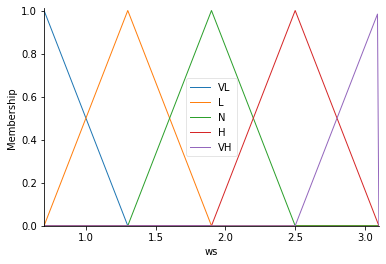

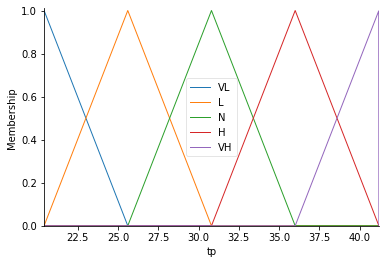

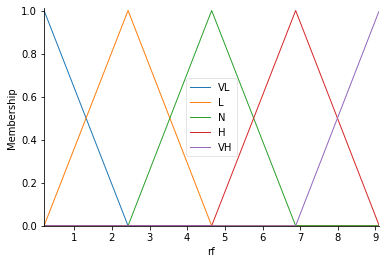

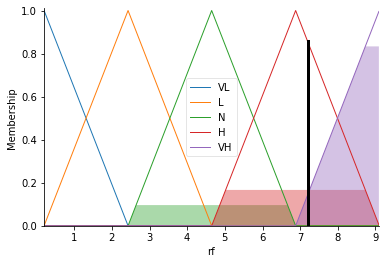

In [5]:
#Fuzzy__logic_in_rainfall_predict
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ws=ctrl.Antecedent(np.arange(0.7,3.1,0.01),'ws')
tp=ctrl.Antecedent(np.arange(20.4,41.2,0.01),'tp')
rf=ctrl.Consequent(np.arange(0.2,9.1,0.01),'rf')

ws['VL']=fuzz.trimf(ws.universe,[0.7,0.7,1.3])
ws['L']=fuzz.trimf(ws.universe,[0.7,1.3,1.9])
ws['N']=fuzz.trimf(ws.universe,[1.3,1.9,2.5])
ws['H']=fuzz.trimf(ws.universe,[1.9,2.5,3.1])
ws['VH']=fuzz.trimf(ws.universe,[2.5,3.1,3.1])

tp['VL']=fuzz.trimf(tp.universe,[20.4,20.4,25.6])
tp['L']=fuzz.trimf(tp.universe,[20.4,25.6,30.8])
tp['N']=fuzz.trimf(tp.universe,[25.6,30.8,36])
tp['H']=fuzz.trimf(tp.universe,[30.8,36,41.2])
tp['VH']=fuzz.trimf(tp.universe,[36,41.2,41.2])

rf['VL']=fuzz.trimf(rf.universe,[0.2,0.2,2.43])
rf['L']=fuzz.trimf(rf.universe,[0.2,2.43,4.65])
rf['N']=fuzz.trimf(rf.universe,[2.43,4.65,6.88])
rf['H']=fuzz.trimf(rf.universe,[4.65,6.88,9.1])
rf['VH']=fuzz.trimf(rf.universe,[6.88,9.1,9.1])

rule1=ctrl.Rule(ws['VL'] & tp['VL'],rf['VL'])
rule2=ctrl.Rule(ws['VL'] & tp['L'],rf['VL'])
rule3=ctrl.Rule(ws['VL'] & tp['N'],rf['L'])
rule4=ctrl.Rule(ws['VL'] & tp['H'],rf['L'])
rule5=ctrl.Rule(ws['VL'] & tp['VH'],rf['N'])
rule6=ctrl.Rule(ws['L'] & tp['VL'],rf['VL'])
rule7=ctrl.Rule(ws['L'] & tp['L'],rf['L'])
rule8=ctrl.Rule(ws['L'] & tp['N'],rf['L'])
rule9=ctrl.Rule(ws['L'] & tp['H'],rf['N'])
rule10=ctrl.Rule(ws['L'] & tp['VH'],rf['H'])
rule11=ctrl.Rule(ws['N'] & tp['VL'],rf['VL'])
rule12=ctrl.Rule(ws['N'] & tp['L'],rf['L'])
rule13=ctrl.Rule(ws['N'] & tp['N'],rf['N'])
rule14=ctrl.Rule(ws['N'] & tp['H'],rf['N'])
rule15=ctrl.Rule(ws['N'] & tp['VH'],rf['H'])
rule16=ctrl.Rule(ws['H'] & tp['VL'],rf['L'])
rule17=ctrl.Rule(ws['H'] & tp['L'],rf['N'])
rule18=ctrl.Rule(ws['H'] & tp['N'],rf['N'])
rule19=ctrl.Rule(ws['H'] & tp['H'],rf['H'])
rule20=ctrl.Rule(ws['H'] & tp['VH'],rf['VH'])
rule21=ctrl.Rule(ws['VH'] & tp['VL'],rf['N'])
rule22=ctrl.Rule(ws['VH'] & tp['L'],rf['N'])
rule23=ctrl.Rule(ws['VH'] & tp['N'],rf['H'])
rule24=ctrl.Rule(ws['VH'] & tp['H'],rf['VH'])
rule25=ctrl.Rule(ws['VH'] & tp['VH'],rf['VH'])

ws.view()
tp.view()
rf.view()

RF_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
RFs=ctrl.ControlSystemSimulation(RF_ctrl)
RFs.input['ws']=3
RFs.input['tp']=35.5
RFs.compute()
print(RFs.output['rf'])
rf.view(sim=RFs)